In [22]:
pip install --upgrade mglearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import numpy as np

# Muat data
data = pd.read_csv("C:\\Users\\Infinix X2\\Documents\\SEMESTER 8\\Machine Learning\\Week 1\\Automobile.csv")

# Pilih fitur dan target
features = data.drop('symboling', axis=1).select_dtypes(include=np.number) # Hanya fitur numerik
target = data['symboling']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.2, random_state=42)

# Inisialisasi dan latih model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

MSE: 0.5893491872033519
RMSE: 0.7676908148488895
R-squared: 0.5979318248016093


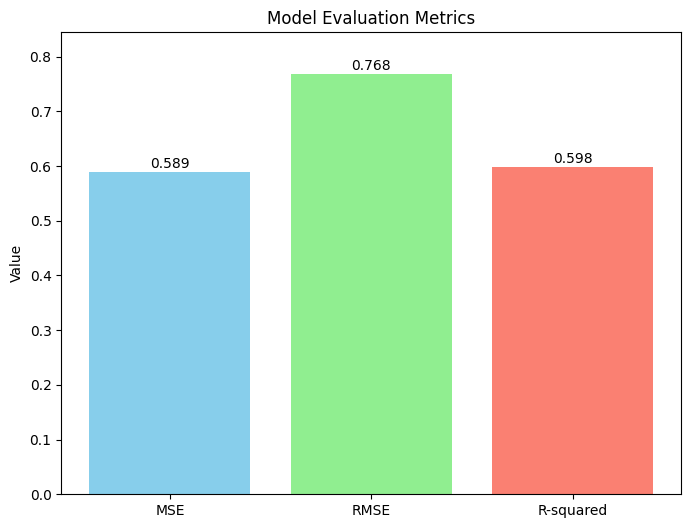

In [8]:
# Hitung MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Hitung RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Hitung R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Visualisasi
metrics = ['MSE', 'RMSE', 'R-squared']
values = [mse, rmse, r2]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel('Value')
plt.title('Model Evaluation Metrics')
plt.ylim(0, max(values) * 1.1) # Sesuaikan batas y-axis

# Tambahkan nilai di atas bar
for i, value in enumerate(values):
    plt.text(i, value + 0.01 * max(values), f'{value:.3f}', ha='center')

plt.show()

w[0]: 0.393906  b: -0.031804


<Figure size 640x480 with 0 Axes>

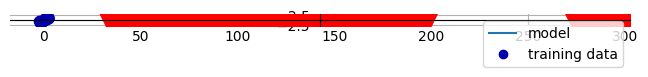

In [34]:
# Contoh visualisasi sederhana (jika hanya menggunakan 1 fitur)
import mglearn
import matplotlib.pyplot as plt

# Asumsikan kita hanya menggunakan 1 fitur, misalnya 'horsepower'
X = data[['horsepower']]
y = data['symboling']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

plt.figure()
mglearn.plots.plot_linear_regression_wave()
plt.plot(X_test, lr.predict(X_test), 'v', markersize=100, color='r')
plt.show()

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer

# Muat data
data = pd.read_csv("C:\\Users\\Infinix X2\\Documents\\SEMESTER 8\\Machine Learning\\Week 1\\HeartDisease.csv")

# Pilih fitur dan target
features = data.drop('num', axis=1).select_dtypes(include=np.number) # Hanya fitur numerik
target = data['num']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.2, random_state=42)

# Inisialisasi dan latih model Logistic Regression
model = LogisticRegression(max_iter=1000) # Tambahkan max_iter untuk konvergensi
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] # Probabilitas untuk kelas positif

c:\Users\Infinix X2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Akurasi: 0.5409836065573771
Presisi: 0.33285714285714285


c:\Users\Infinix X2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Recall: 0.321127531472359
F1-score: 0.3039040616246499


c:\Users\Infinix X2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC: 0.8000643423640572


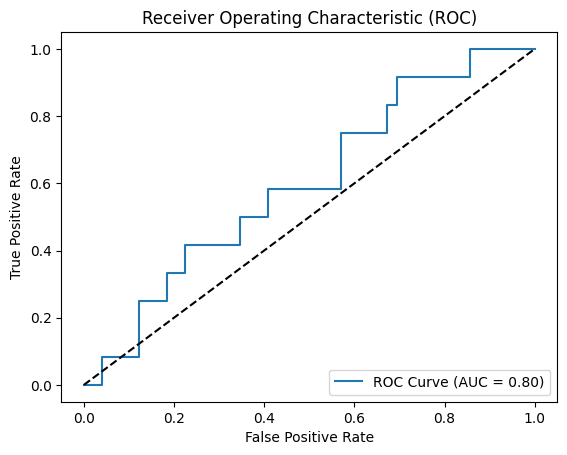

In [17]:
from sklearn.multiclass import OneVsRestClassifier

# Hitung Akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Hitung Presisi
precision = precision_score(y_test, y_pred, average='macro')
print("Presisi:", precision)

# Hitung Recall
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# Hitung F1-score
f1 = f1_score(y_test, y_pred, average='macro')
print("F1-score:", f1)

# Hitung AUC
classifier = OneVsRestClassifier(model)
y_prob = classifier.fit(X_train, y_train).predict_proba(X_test)
auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print("AUC:", auc)

# Hitung dan plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1], pos_label=1)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()